In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
data = pd.read_csv('downsampled_data.csv')

In [7]:
# Filter the dataset to include only the specified features
selected_features = [
 'ParticulateMax',
 'TemperatureMin',
 'TemperatureDifference',
 'AbsoluteHumidity',
 'Particulate',
 'VisibilityMin',
 'Temperature',
 'VisibilityMax',
 'Distance',
    'RFL_Att', 
    'FSO_Att',
 'Visibility']

filtered_data = data[selected_features]

In [8]:
# Step 1: Predict RF_Att using the generic model
# Separate predictors and target for RF_Att
X_fso = filtered_data.drop(columns=['RFL_Att', 'FSO_Att'])  # Predictors for RF_Att
y_fso = filtered_data['FSO_Att']  # Target variable: RF_Att

# Train-test split for RF_Att
X_fso_train, X_fso_test, y_fso_train, y_fso_test = train_test_split(X_fso, y_fso, test_size=0.3, random_state=42)

# Train the generic model for RF_Att
fso_model_fso = RandomForestRegressor(random_state=42)
fso_model_fso.fit(X_fso_train, y_fso_train)

# Predict RF_Att
predicted_fso_att = fso_model_fso.predict(X_fso_test)


In [9]:
# Evaluate the model for FSO_Att
rmse_fso = np.sqrt(mean_squared_error(y_fso_test, predicted_fso_att))
r2_fso = r2_score(y_fso_test, predicted_fso_att)

# Display the results for FSO_Att prediction
print("FSO_Att Model Performance Using Predicted FSO_Att:")
print(f"RMSE: {rmse_fso}")
print(f"R^2: {r2_fso}")

FSO_Att Model Performance Using Predicted FSO_Att:
RMSE: 1.4237104758064303
R^2: 0.9025651552863787


In [24]:
X_FS = data.drop(columns=['RFL_Att', 'FSO_Att'])  # Predictors for RF_Att
y_FS = data['RFL_Att']  # Target variable: RF_Att

X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_FS, y_FS, test_size=0.3, random_state=42)

X_fs_train = X_fs_train.copy()
X_fs_train['Predicted_FSO_Att'] = fso_model_fso.predict(X_fso_train)  # Add predicted RF_Att to train data

X_fs_test = X_fs_test.copy()
X_fs_test['Predicted_FSO_Att'] = predicted_fso_att  # Add predicted RF_Att to test data


In [25]:
X_fs_train.shape

(6374, 26)

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def rank_predictor_importance(data, target_column):
    """
    Ranks the importance of predictor variables using the described algorithm.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing predictors and the target column.
        target_column (str): Name of the target variable column.

    Returns:
        pd.DataFrame: A table with each predictor, RMSE, R^2, and rank based on importance.
    """
    # Step 1: Initialize S and R
    predictors = list(data.columns)
    #predictors.remove(target_column)
    S = predictors.copy()
    R = pd.DataFrame(columns=['Predictor', 'RMSE', 'R^2'])

    while S:
        # Step 3: Train Random Forest model on S
        X = data[S]
        y = target_column
        model = RandomForestRegressor(random_state=42, oob_score=True)
        model.fit(X, y)

        # Step 4: Calculate RMSE and R^2
        y_pred = model.oob_prediction_
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)

        # Step 5: Rank predictor importance
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Predictor': S, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=True)

        # Step 6: Remove least important predictor
        least_important = importance_df.iloc[0]
        S.remove(least_important['Predictor'])

        # Add new row to R
        R = pd.concat([R, pd.DataFrame([{
            'Predictor': least_important['Predictor'],
            'RMSE': rmse,
            'R^2': r2
        }])], ignore_index=True)

    # Step 8: Return the result
    return R








In [27]:
target_column = y_fs_train  # Replace with your target variable name

# Run the ranking algorithm
result = rank_predictor_importance(X_fs_train, target_column)

C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Jitendra Sharma\AppData\Local\Temp\ipykernel_13376\1057812062.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  R = pd.concat([R, pd.DataFrame([{
C:\Users\Jitendra Sharma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  w

In [28]:
result

,Predictor,RMSE,R^2
0,WindSpeedMin,0.936791,0.934134
1,WindDirection,0.940045,0.933676
2,WindSpeedMax,0.926609,0.935558
3,Time,0.921797,0.936226
4,WindSpeed,0.929866,0.935105
5,TemperatureMax,0.926816,0.935530
6,TemperatureDifference,0.918724,0.936651
7,ParticulateMin,0.931740,0.934843
8,TemperatureMin,0.931197,0.934919
9,VisibilityMax,0.928126,0.935347


In [38]:
import matplotlib.pyplot as plt

def plot_importance_ranking_dual_y(results):
    """
    Plots RMSE and R^2 values as predictors are removed, with RMSE on the left y-axis
    and R^2 on the right y-axis, and two separate line diagrams.

    Parameters:
        results (pd.DataFrame): DataFrame with 'Predictor', 'RMSE', and 'R^2' columns.
    """
    # Ensure the results are sorted by the order of removal
    results = results.reset_index(drop=True)

    # Create a figure and axis for RMSE
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot RMSE on the left y-axis
    ax1.plot(results['Predictor'], results['RMSE'], marker='o', color='blue', label='RMSE')
    ax1.set_xlabel('Predictors Removed (in Order of Removal)')
    ax1.set_ylabel('RMSE', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(len(results['Predictor'])))
    ax1.set_xticklabels(results['Predictor'], rotation=45, ha='right')

    # Create a second y-axis for R^2
    ax2 = ax1.twinx()
    ax2.plot(results['Predictor'], results['R^2'], marker='x', color='green', label='R^2')
    ax2.set_ylabel('R^2', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title and grid
    fig.suptitle('Change in RMSE and R^2 During Feature Elimination (RF)', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Combine the legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Tight layout for better spacing
    fig.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()

# Example Usage
# Assuming `results` is a DataFrame with columns 'Predictor', 'RMSE', and 'R^2'
# plot_importance_ranking_dual_y(results)


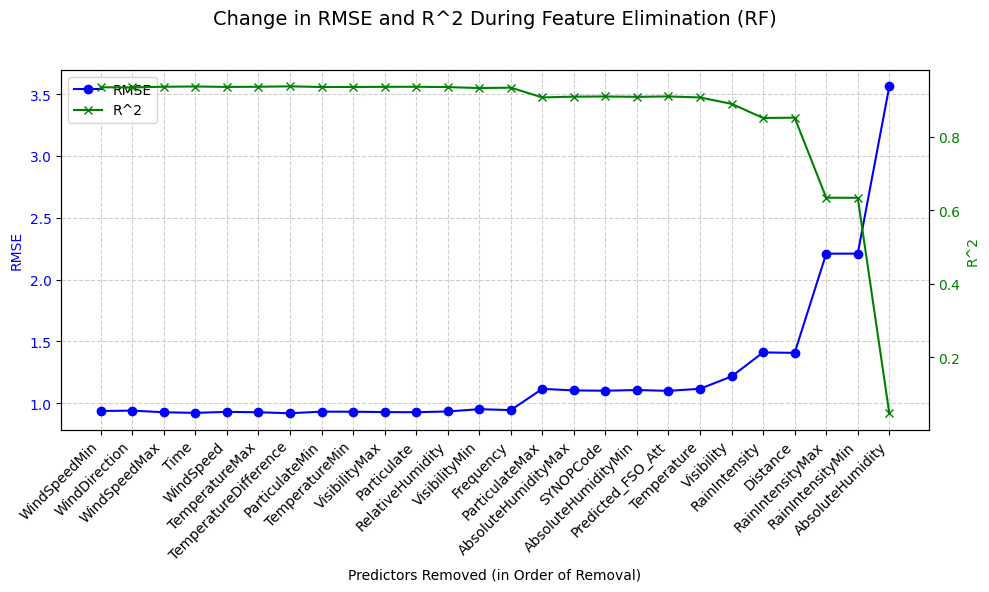

In [39]:
plot_123 = plot_importance_ranking_dual_y(result)
plot_123

In [31]:
# Filter the dataset to include only the specified features
selected_features_1 = ['SYNOPCode',
 'AbsoluteHumidityMin',
 'Predicted_FSO_Att',
 'Temperature',
 'Visibility',
 'RainIntensity',
 'Distance',
 'RainIntensityMax',
 'RainIntensityMin',
 'AbsoluteHumidity']

filtered_data_1 = X_fs_train[selected_features_1]

In [23]:
y_fs_train

5356     8.105657
2283     7.616378
4253     2.723622
3704    20.981307
418      2.396103
          ...    
5734     2.600140
5191     4.178260
5390     5.693310
860      9.333911
7270    16.328475
Name: FSO_Att, Length: 6374, dtype: float64

In [32]:
# Step 2: Use predicted RF_Att to predict FSO_Att
# Add predicted RF_Att to test predictors
X_rf_train = X_fs_train.loc[filtered_data_1.index].copy()
#X_rf_train['Predicted_FSO_Att'] = fso_model_fso.predict(X_rf_train)  # Add predicted RF_Att to train data

X_rf_test = X_fs_test.copy()
#X_rf_test['Predicted_FSO_Att'] = predicted_fso_att  # Add predicted RF_Att to test data

# Target for FSO_Att
y_rf_train =  y_fs_train
y_rf_test = y_fs_test  #filtered_data_1.loc[X_rf_test.index, 'FSO_Att']

# Train the model for FSO_Att using predicted RF_Att
rf_model_rf = RandomForestRegressor(random_state=42)
rf_model_rf.fit(X_rf_train, y_rf_train)

# Predict FSO_Att
predicted_rf_att = rf_model_rf.predict(X_rf_test)

# Evaluate the model for FSO_Att
rmse_rf = np.sqrt(mean_squared_error(y_rf_test, predicted_rf_att))
r2_rf = r2_score(y_rf_test, predicted_rf_att)

In [36]:
y_rf_test.to_csv('Results/Mtd3_pred_RF.csv', index=False)

In [33]:
# Display the results for FSO_Att prediction
print("FSO_Att Model Performance Using Predicted RF_Att:")
print(f"RMSE: {rmse_rf}")
print(f"R^2: {r2_rf}")

FSO_Att Model Performance Using Predicted RF_Att:
RMSE: 0.9733111466357843
R^2: 0.9336452822145849


In [35]:

# Initialize a dictionary to store results for each weather condition 
results = {} 
# Loop through unique SYNOP codes (weather conditions)
for synop in X_rf_test['SYNOPCode'].unique(): 
    # Filter test data for the current SYNOP code 
    X_test_synop = X_rf_test[X_rf_test['SYNOPCode'] == synop]
    y_test_synop = y_rf_test[X_rf_test.index.isin(X_test_synop.index)] 
    
    # Make predictions for this subset 
    predictions = rf_model_rf.predict(X_test_synop) 
    
    # Calculate RMSE and R² for this subset 
    rmse = np.sqrt(mean_squared_error(y_test_synop, predictions)) 
    r2 = r2_score(y_test_synop, predictions) 
    
    # Store results 
    results[synop] = {'RMSE': rmse, 'R²': r2}
    
# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index() 
results_df.columns = ['SYNOP', 'RMSE', 'R²']

print("Weather Condition Evaluation Results:")
print(results_df)

Weather Condition Evaluation Results:
   SYNOP      RMSE        R²
0      6  1.523206  0.921426
1      0  0.505394  0.967147
2      5  0.752715  0.939425
3      8  1.364668  0.806541
4      4  0.409491  0.933371
5      7  0.347835  0.946164
6      3  0.259790  0.992355
